In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#1.Create or Connect to Database and Insert Sample Data

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Apple', 10, 1.50),
    ('Banana', 20, 0.80),
    ('Orange', 15, 1.20),
    ('Apple', 5, 1.50),
    ('Banana', 10, 0.80),
    ('Orange', 10, 1.20)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [ ]:
#2. Run SQL Query and Load into Pandas

In [3]:
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)

In [ ]:
#3. Print Results

In [4]:
print("=== Sales Summary ===")
print(df)

=== Sales Summary ===
  product  total_qty  revenue
0   Apple         15     22.5
1  Banana         30     24.0
2  Orange         25     30.0


In [ ]:
#4. Plot and Save Bar Chart

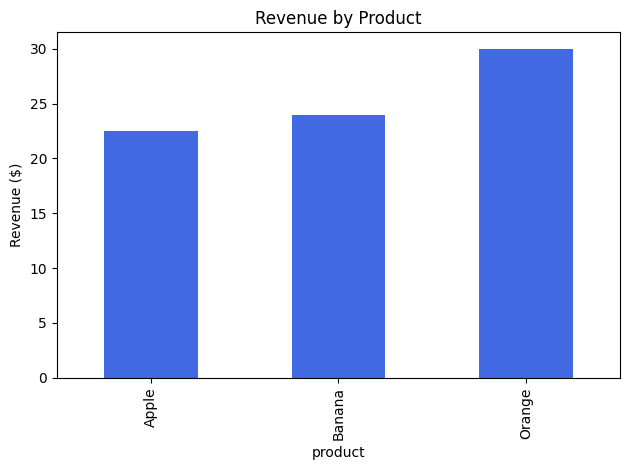

In [16]:
df.plot(kind='bar', x='product', y='revenue', color='royalblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()